In [7]:
#Install reqired libraries
!pip install emoji

In [8]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# read text from file
file_location = './drive/MyDrive/WhatsApp Chat with Illegal Data Masters 🎯 (1).txt'
with open(file_location) as f:
  data = f.read()
  data = ' '.join(data.split('\\n'))

#print(data)

#separate user messages and datetime of the chat
import re
#pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

pattern = '\d{2}/\d{2}/\d{4},\s\d{2}:\d{2}\s(?:am|pm|)'

user_messages = re.split(pattern, data)[1:]
message_dates =  re.findall(pattern, data)

#print(data)
print(user_messages)
print(message_dates)




[' - Krishna MGM: Kal band hai saab\n06/09/2023, 8:46\u202fam - Krishna MGM: Hello\n06/09/2023, 9:11\u202fam - Ibrahim MGM: Yes\n06/09/2023, 9:43\u202fam - Krishna MGM: Practical\n07/09/2023, 9:58\u202fam - Yash Mgm: Practical ko koi aaraha hai kya?\n', ' - Krishna MGM: Bhi\n', ' - Krishna MGM: Bhi\n', ' - Krishna MGM: Nhi\n07/09/2023, 1:10\u202fpm - Ibrahim MGM: .\n07/09/2023, 1:12\u202fpm - Shibaan MGM: IMG-20230901-WA0002.jpg (file attached)\n07/09/2023, 2:58\u202fpm - Shibaan MGM: <Media omitted>\n07/09/2023, 4:39\u202fpm - Sakshi ♥️💞: from queue import PriorityQueue\n\n# Define a graph as an adjacency list\ngraph = {\n    \'A\': [(\'B\', 5), (\'C\', 6)],\n    \'B\': [(\'D\', 3), (\'E\', 4)],\n    \'C\': [(\'F\', 7),(\'G\', 8)],\n    \'D\': [],\n    \'E\': [(\'H\', 2), (\'I\', 1)],\n    \'F\': [(\'J\', 4)],\n    \'G\': [],\n    \'H\': [],\n    \'I\': [],\n    \'J\': []\n    \n}\n\ndef best_first_search(graph, start, goal):\n    visited = set()\n    priority_queue = PriorityQueue()\

# New Section

In [13]:
# load user messages and dates into dataframe
import pandas as pd
df = pd.DataFrame({'user_message':user_messages, 'message_date': message_dates})
# convert message_date type
#df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df['message_date'] = pd.to_datetime(df['message_date'])
df.rename(columns={'message_date': 'date'}, inplace=True)

print(df)

                                          user_message                date
0     - Krishna MGM: Kal band hai saab\n06/09/2023,... 2023-03-09 23:24:00
1                                 - Krishna MGM: Bhi\n 2023-07-09 10:08:00
2                                 - Krishna MGM: Bhi\n 2023-07-09 10:08:00
3     - Krishna MGM: Nhi\n07/09/2023, 1:10 pm - Ibr... 2023-07-09 10:08:00
4                     - Krishna MGM: <Media omitted>\n 2023-07-09 22:14:00
..                                                 ...                 ...
269   - Ibrahim MGM: Anyone have dates of the distr... 2023-10-27 00:28:00
270   - Ibrahim MGM: The index*\n27/10/2023, 6:15 p... 2023-10-27 00:28:00
271   - Huda MGM: IMG-20231028-WA0001.jpg (file att... 2023-10-28 11:41:00
272   - Huda MGM: IMG-20231028-WA0002.jpg (file att... 2023-10-28 11:54:00
273             - Ashul MGM: College me hai kya koi?\n 2023-10-30 12:21:00

[274 rows x 2 columns]


In [14]:
# separate users and messages
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:# user name
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])

df['user'] =  users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

print(df.tail())


                   date            user  \
269 2023-10-27 00:28:00   - Ibrahim MGM   
270 2023-10-27 00:28:00   - Ibrahim MGM   
271 2023-10-28 11:41:00      - Huda MGM   
272 2023-10-28 11:54:00      - Huda MGM   
273 2023-10-30 12:21:00     - Ashul MGM   

                                               message  
269  Anyone have dates of the distrbuting computing...  
270                                                     
271          IMG-20231028-WA0001.jpg (file attached)\n  
272  IMG-20231028-WA0002.jpg (file attached)\nPract...  
273                          College me hai kya koi?\n  


In [15]:
df.groupby('user')['message'].count().sort_values(ascending=False)

user
 - Yash Mgm           91
 - Krishna MGM        70
 - Ashul MGM          36
 - Ibrahim MGM        33
 - Hashim MGM         26
 - Shibaan MGM         7
 - Sakshi ♥️💞          5
 - Ayman MGM           2
 - Huda MGM            2
group_notification     2
Name: message, dtype: int64

In [16]:
import emoji

emojis = []
for message in df['message']:
  emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,68
1,👑,4
2,😩,4
3,😤,3
4,😋,3
5,🌷,3
6,💤,3
7,😱,2
8,🎉,2
9,☺,1


<Axes: xlabel='am|pm'>

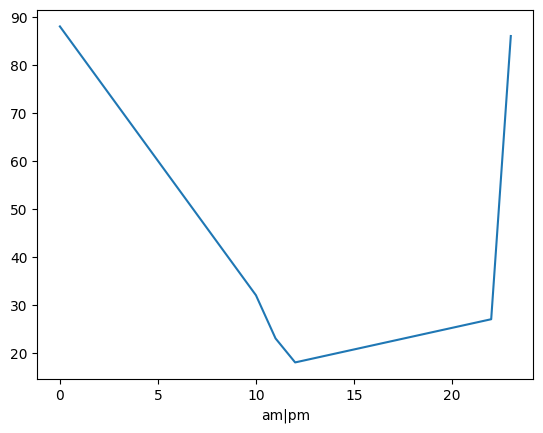

In [17]:
#3 sleep cycle
df['am|pm'] = df['date'].apply(lambda x: x.hour)
df.groupby(['am|pm']).size().sort_index().plot(x="am|pm", kind='line')

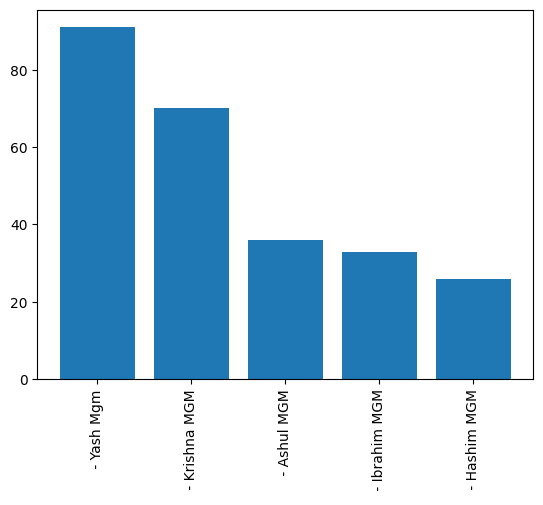

In [18]:
import matplotlib.pyplot as plt

x = df['user'].value_counts().head()
user_names = x.index
msg_count = x.values

plt.bar(user_names, msg_count)
plt.xticks(rotation='vertical')
plt.show()

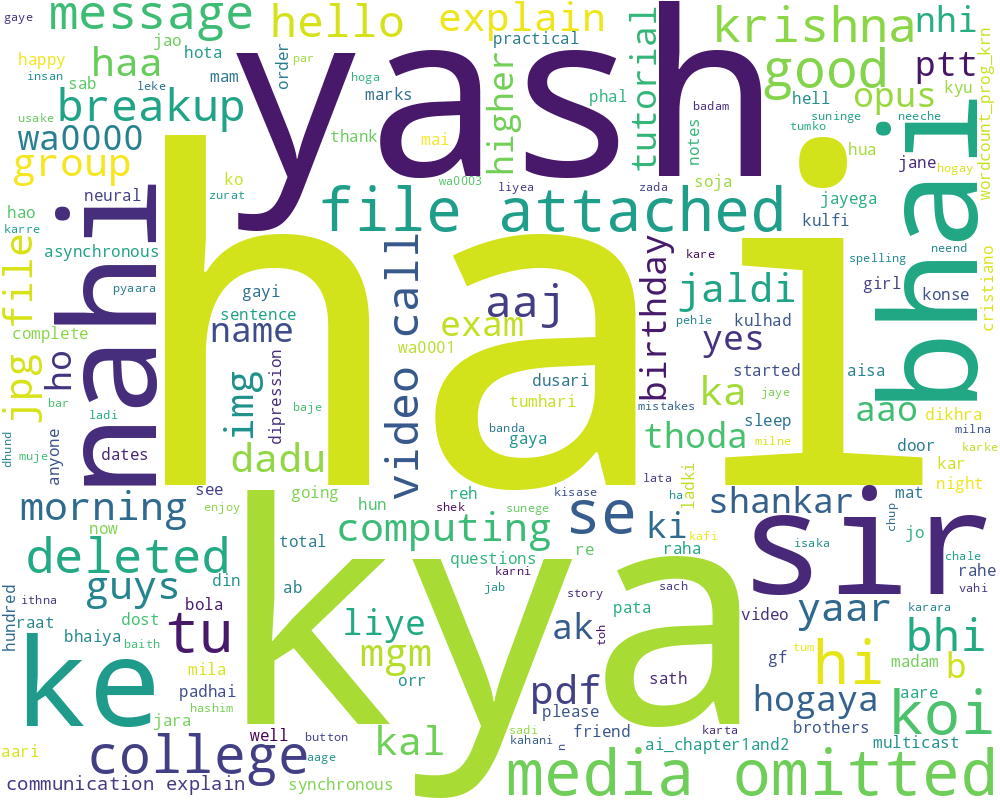

In [19]:
from wordcloud import WordCloud, STOPWORDS
all_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
for msg in df['message'].values:
  words = str(msg).lower().split()
  for word in words:
    all_words = all_words + word + ' '

wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)


wordcloud.to_image()